In [1]:
import numpy as np
import pickle
import traceback

def save_object(obj, path: str):
    assert obj is not None
    try:
        with open(path, 'wb') as f:
            pickle.dump(obj, f)
    except:
        traceback.print_exc()


def load_object(path: str):
    obj = None
    try:
        with open(path, 'rb') as f:
            obj = pickle.load(f)
    except:
        traceback.print_exc()
    assert obj is not None
    return obj

Resnet

In [2]:
resnet_conv_idxs = [0, 3, 6, 10, 13, 17, 20, 22, 26, 29, 33, 36, 38, 42, 45, 49, 52, 54, 58, 61]
layer_latency_resnet_local = [0.31938815116882324, 0.01917099952697754, 0.016346454620361328, 6.119774580001831, 0.013007640838623047, 0.009798049926757812, 6.122926712036133, 0.013004064559936523, 0.020938396453857422, 0.009432315826416016, 5.943359375, 0.013077735900878906, 0.00946807861328125, 5.9833362102508545, 0.013011455535888672, 0.0164029598236084, 0.009190559387207031, 2.891289710998535, 0.006728649139404297, 0.004436492919921875, 5.7523181438446045, 0.008565902709960938, 0.3371391296386719, 0.006335258483886719, 0.008439302444458008, 0.004773616790771484, 5.854198217391968, 0.0044879913330078125, 0.004376411437988281, 5.712428569793701, 0.00680994987487793, 0.009032249450683594, 0.004441022872924805, 3.230304002761841, 0.0034694671630859375, 0.001974821090698242, 6.262700796127319, 0.0028994083404541016, 0.3606750965118408, 0.0021474361419677734, 0.003744840621948242, 0.0031354427337646484, 6.21346378326416, 0.0030145645141601562, 0.0027158260345458984, 6.330957412719727, 0.003171205520629883, 0.0030405521392822266, 0.002832174301147461, 3.3727400302886963, 0.0025925636291503906, 0.0014393329620361328, 6.12781023979187, 0.0016672611236572266, 0.34396862983703613, 0.0017862319946289062, 0.0016117095947265625, 0.0008702278137207031, 6.137946605682373, 0.0018165111541748047, 0.0009305477142333984, 6.126903057098389, 0.001577138900756836, 0.0016884803771972656, 0.001089334487915039]
# save_object(layer_latency_resnet_local, 'resnet_layer_latecy_local.rec')
n_layers = len(layer_latency_resnet_local)
print('Local:', np.sum(layer_latency_resnet_local))
print('Max:', max(layer_latency_resnet_local))
print('Conv:', sum([layer_latency_resnet_local[conv_idx] for conv_idx in resnet_conv_idxs]))
resnet_local = 89.82411909103394
resnet_local_min = 89.54362845420837
resnet_local_max = resnet_local + 0.45

Local: 89.82411909103394
Max: 6.330957412719727
Conv: 89.54362845420837


In [3]:
# test=1--day=20240520--repetition=30
uncoded_conv_latency = [1.1464711666107177, 2.640662924448649, 2.5144742329915366, 2.498832352956136, 2.4537835756937665, 1.7524255673090616, 1.3944353580474853, 1.3944852749506633, 1.3327118158340454, 1.3597405831019083, 1.0284502426783244, 0.8284149885177612, 0.6676138480504353, 1.1839116017023723, 1.1250763257344565, 0.6338433663050334, 1.2039329290390015, 0.23683421611785888, 1.5352674722671509, 1.3633965412775675]
coded_conv_latency = [1.24864555199941, 2.833646710713704, 2.643864218393962, 2.656615471839905, 2.775672705968221, 1.6665042718251546, 1.4052668889363606, 1.6292658964792888, 1.3677515029907226, 1.350804591178894, 0.9934065183003743, 0.8213071664174397, 0.7331068674723308, 0.8647999127705892, 0.903248397509257, 0.6068140824635824, 0.9865440924962362, 0.33640236059824624, 1.037086304028829, 1.057300329208374]

min_layer_uncoded = []
min_layer_coded = []
for layer_id in range(n_layers):
    if layer_id not in resnet_conv_idxs:
        min_layer_uncoded.append(layer_latency_resnet_local[layer_id])
        min_layer_coded.append(layer_latency_resnet_local[layer_id])
    else:
        idx = resnet_conv_idxs.index(layer_id)
        # print(f'Conv Layer_idx:{layer_id}; Local:{layer_latency_resnet_local[layer_id]:.6f}; Uncoded:{uncoded_conv_latency[idx]:.6f}; Coded:{coded_conv_latency[idx]:.6f}')
        min_layer_uncoded.append(min(layer_latency_resnet_local[layer_id], uncoded_conv_latency[idx]))
        min_layer_coded.append(min(layer_latency_resnet_local[layer_id], coded_conv_latency[idx]))
print('Uncoded:', sum(min_layer_uncoded))
print('Coded:  ', sum(min_layer_coded))


Uncoded: 26.383887108167013
Coded:   25.604728539784745


fail=0

In [4]:
# test=1--day=20240522--model=resnet--fail=0--repetition=3
# nf0 = {'repetition': {'min':37.20432925224304, 'mean':38.0160621802012, 'max':38.868470191955566},
# 'uncoded': {'min':25.264079809188843, 'mean':29.523787419001266, 'max':35.954306840896606},
# 'coded': {'min':25.72342562675476, 'mean':27.176944176355995, 'max':28.86991834640503}}

In [5]:
# 一次非典型的结果
# test=2--day=20240522--model=resnet--fail=0--repetition=30
# nf0 = {'repetition': {'min':38.382057905197144, 'mean':41.44952406088511, 'max':45.89125037193298},
# 'uncoded': {'min':23.512204885482788, 'mean':28.808923721313477, 'max':53.07109308242798},
# 'coded': {'min':24.541630506515503, 'mean':25.45921155611674, 'max':26.818933725357056}}

In [6]:
# 河里
# test=3--day=20240525--model=resnet--fail=0--repetition=30
# nf0 = {'repetition': {'min':36.20972037315369, 'mean':37.978605341911326, 'max':40.44732165336609},
# 'uncoded': {'min':22.391023874282837, 'mean':25.15702340602875, 'max':34.52159786224365},
# 'coded': {'min':24.216022491455078, 'mean':24.937415242195133, 'max':27.094403982162476}}

In [7]:
# test=3--day=20240526--model=resnet--fail=0--repetition=10
nf0 = {'repetition': {'min':34.49806213378906, 'mean':36.43476657867432, 'max':39.50594520568848},
'uncoded': {'min':21.60036063194275, 'mean':22.682096219062807, 'max':26.78972101211548},
'coded': {'min':23.65511417388916, 'mean':24.238034582138066, 'max':24.81348466873169}}

fail=1

In [8]:
# test=1--day=20240526--model=resnet--fail=1--repetition=12
nf1 = {'repetition': {'min':36.75760221481323, 'mean':40.6286277572314, 'max':46.863218784332275},
'uncoded': {'min':30.06712818145752, 'mean':32.96573748191198, 'max':36.80478882789612},
'coded': {'min':24.655969381332397, 'mean':25.80605181058248, 'max':27.96493673324585}}

fail=2

In [9]:
# test=1--day=20240527--model=resnet--fail=2--repetition=12
nf2 = {'repetition': {'min':39.55053925514221, 'mean':41.66065196196239, 'max':45.780380725860596},
'uncoded': {'min':36.83668398857117, 'mean':40.65775875250499, 'max':45.744242668151855},
'coded': {'min':26.033243656158447, 'mean':27.25547832250595, 'max':28.860251665115356}}

VGG16

In [10]:
vgg16_layer_latency_local = [0.319610595703125, 6.18793511390686, 0.013349294662475586, 2.8713788986206055, 5.970198631286621,
                        0.0062410831451416016, 3.2753548622131348, 6.294331312179565, 6.17841100692749,
                        0.003329753875732422, 3.1216278076171875, 6.162682294845581, 6.1657116413116455,
                        0.0019109249114990234, 1.175356149673462, 1.175065279006958, 1.176065444946289,
                        0.0003490447998046875, 0.2157268524169922, 0.00012612342834472656, 0.0003216266632080078,
                        0.03555011749267578, 0.00012946128845214844, 0.0003199577331542969, 0.00879669189453125][:18]
vgg_local = sum(vgg16_layer_latency_local)
print(vgg_local)
# save_object(vgg16_layer_latency_local, 'vgg16_layer_latecy_local.rec')

50.09890913963318


fail=0

In [11]:
# test=1--day=20240525--model=vgg16--fail=0--repetition=10
nf0 = {'repetition': {'min':16.306212425231934, 'mean':17.65407855510712, 'max':19.298189401626587},
'uncoded': {'min':10.407930612564087, 'mean':12.95655002593994, 'max':18.762680768966675},
'coded': {'min':11.088831663131714, 'mean':11.369258260726927, 'max':11.95471477508545}}

In [12]:
# test=2--day=20240526--model=vgg16--fail=0--repetition=10
{'repetition': {'min':17.60517120361328, 'mean':18.472139573097227, 'max':19.115964889526367},
'uncoded': {'min':9.97995376586914, 'mean':10.37978458404541, 'max':10.950425863265991},
'coded': {'min':10.946062326431274, 'mean':11.19745533466339, 'max':11.441893100738525}}

# test=3--day=20240526--model=vgg16--fail=0--repetition=10
# nf0 = {'repetition': {'min':17.75412678718567, 'mean':18.58631443977356, 'max':19.329913854599},
# 'uncoded': {'min':10.058428287506104, 'mean':10.477705907821655, 'max':11.351791381835938},
# 'coded': {'min':11.23284125328064, 'mean':11.4752295255661, 'max':11.760030746459961}}

# test=4--day=20240526--model=vgg16--fail=0--repetition=10
# repetition: min=16.535200119018555, mean=17.527597355842595, max=19.02436113357544
# uncoded: min=10.1329665184021, mean=10.419800925254819, max=11.163883686065674
# coded: min=11.03896951675415, mean=11.408407592773438, max=12.578078269958496

# test=6--day=20240617--model=vgg16--fail=0--repetition=12
# 'uncoded': {'min':10.466238021850586, 'mean':12.23529189825058, 'max':17.148162364959717}
# 'coded': {'min':11.214846134185791, 'mean':11.808266321818035, 'max':14.852079153060913}

# test=6--day=20240617--model=vgg16--fail=0--repetition=12
# 'uncoded': {'min':10.435851573944092, 'mean':11.822813312212626, 'max':13.576246976852417}
# 'coded': {'min':11.24543809890747, 'mean':11.543751200040182, 'max':11.98360562324524}

# test=6--day=20240619--model=vgg16--fail=0--repetition=2
# 'uncoded': {'min':10.33419156074524, 'mean':10.79033625125885, 'max':11.246480941772461}
# 'coded': {'min':11.236045122146606, 'mean':11.451521158218384, 'max':11.666997194290161}

# test=6--day=20240619--model=vgg16--fail=0--repetition=10
# 'uncoded': {'min':10.108823537826538, 'mean':10.37978458404541, 'max':10.950425863265991}
# 'coded': {'min':11.160043478012085, 'mean':11.319119620323182, 'max':11.575105667114258}

# Pi as master
# 'uncoded': {'min':11.248255491256714, 'mean':11.802639198303222, 'max':13.463849306106567}
# 'coded': {'min':12.153817176818848, 'mean':12.45761170387268, 'max':12.758150815963745}


{'repetition': {'min': 17.60517120361328,
  'mean': 18.472139573097227,
  'max': 19.115964889526367},
 'uncoded': {'min': 9.97995376586914,
  'mean': 10.37978458404541,
  'max': 10.950425863265991},
 'coded': {'min': 10.946062326431274,
  'mean': 11.19745533466339,
  'max': 11.441893100738525}}

fail=1

In [13]:
# test=2--day=20240526--model=vgg16--fail=1--repetition=10
nf1 = {'repetition': {'min':16.839792251586914, 'mean':18.109914159774778, 'max':19.517773389816284},
'uncoded': {'min':13.8601553440094, 'mean':14.370307826995848, 'max':15.899982213973999},
'coded': {'min':11.021223306655884, 'mean':11.338416290283204, 'max':12.007516622543335}}

fail=2

In [14]:
# test=1--day=20240526--model=vgg16--fail=2--repetition=12
nf2 = {'repetition': {'min':17.213825464248657, 'mean':18.363510211308796, 'max':19.588952779769897},
'uncoded': {'min':15.995882034301758, 'mean':17.240802725156147, 'max':20.019854068756104},
'coded': {'min':11.709915399551392, 'mean':12.191362380981444, 'max':13.329218864440918}}

Plot Data

Coded compared to uncoded reduction ratio [-0.09331215  0.23751301  0.29287733]
Repetition increasing ratio 0.02000149808147711
Uncoded    increasing ratio 0.6833806048236628
CoCoI      increasing ratio 0.08876186746119585


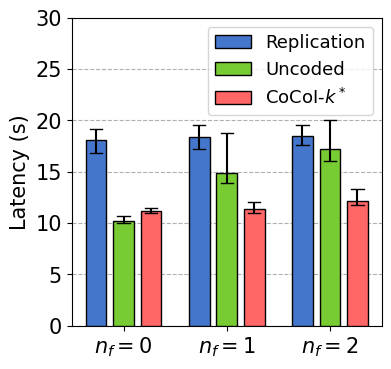

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 12
# labels = ['Local', 'Repetition', 'Uncoded', 'Coded']
# labels = ['local','$n_f=0$','$n_f=1$','$n_f=2$']
labels = ['$n_f=0$','$n_f=1$','$n_f=2$']
methods = ['repetition', 'uncoded', 'coded']

# vgg16
# fail=0
vgg16_f0 = {'repetition': {'min':16.839792251586914, 'mean':18.109914159774778, 'max':19.115964889526367},
'uncoded': {'min':9.97995376586914, 'mean':10.241773414611815, 'max':10.708218812942505},
'coded': {'min':10.946062326431274, 'mean':11.19745533466339, 'max':11.441893100738525}}
# vgg16_f0 = {'repetition': {'min':16.306212425231934, 'mean':17.65407855510712, 'max':19.298189401626587},
# 'uncoded': {'min':10.407930612564087, 'mean':12.95655002593994, 'max':15.899982213973999},  # 换了一下
# 'coded': {'min':11.088831663131714, 'mean':11.369258260726927, 'max':11.95471477508545}}
# fail=1
vgg16_f1 = {'repetition': {'min':17.213825464248657, 'mean':18.363510211308796, 'max':19.517773389816284},
'uncoded': {'min':13.8601553440094, 'mean':14.870307826995848, 'max':18.762680768966675},  # 换了一下
'coded': {'min':11.021223306655884, 'mean':11.338416290283204, 'max':12.007516622543335}}
# fail=2
vgg16_f2 = {'repetition': {'min':17.60517120361328, 'mean':18.472139573097227, 'max':19.588952779769897},
'uncoded': {'min':15.995882034301758, 'mean':17.240802725156147, 'max':20.019854068756104},
'coded': {'min':11.709915399551392, 'mean':12.191362380981444, 'max':13.329218864440918}}

repetition_mean = [vgg16_f0['repetition']['mean'], vgg16_f1['repetition']['mean'], vgg16_f2['repetition']['mean']]
uncoded_mean = [vgg16_f0['uncoded']['mean'], vgg16_f1['uncoded']['mean'], vgg16_f2['uncoded']['mean']]
coded_mean = [vgg16_f0['coded']['mean'], vgg16_f1['coded']['mean'], vgg16_f2['coded']['mean']]
repetition_min = [vgg16_f0['repetition']['min'], vgg16_f1['repetition']['min'], vgg16_f2['repetition']['min']]
uncoded_min = [vgg16_f0['uncoded']['min'], vgg16_f1['uncoded']['min'], vgg16_f2['uncoded']['min']]
coded_min = [vgg16_f0['coded']['min'], vgg16_f1['coded']['min'], vgg16_f2['coded']['min']]
repetition_max = [vgg16_f0['repetition']['max'], vgg16_f1['repetition']['max'], vgg16_f2['repetition']['max']]
uncoded_max = [vgg16_f0['uncoded']['max'], vgg16_f1['uncoded']['max'], vgg16_f2['uncoded']['max']]
coded_max = [vgg16_f0['coded']['max'], vgg16_f1['coded']['max'], vgg16_f2['coded']['max']]
repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
coded_mean = np.asarray(coded_mean)
repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
coded_min = np.asarray(coded_min)
repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
coded_max = np.asarray(coded_max)

print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#FF6666']  # only for distributed methods except local

plt.figure(figsize=(4, 4))
plt.grid(axis='y', ls='--', zorder=0)
# plt.bar(0, 50.35987997055054, width, label='Local', color=colors[0], linewidth=1.0, edgecolor='black', yerr=[[50.35987997055054 - vgg_local], [50.60205912590027 - 50.35987997055054]], zorder=10)

plt.bar(x - width*4/3, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*4/3, coded_mean, width, label='CoCoI-$k^*$', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

# draw the cap of the errorbar
errorbar_length = 0.12
errorbar_width = 1
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [vgg_local, vgg_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [50.60205912590027, 50.60205912590027], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

mins = [repetition_min, uncoded_min, coded_min]
maxs = [repetition_max, uncoded_max, coded_max]
offsets = np.asarray([-1,0,1]) * (width*4/3)
for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=30)
plt.legend(fontsize=13)
# plt.tight_layout()
# plt.title('vgg16 inference')
file_name = 'vgg16_inference_normal'
save = False
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()
# 差不多了就差把图调一下了，如果可以把coded的结果再优化一点就更好了

Coded compared to uncoded reduction ratio [-0.06859764  0.21718567  0.32963648]
Repetition increasing ratio 0.14343128484173784
Uncoded    increasing ratio 0.7925044651884874
CoCoI      increasing ratio 0.1244920965081695


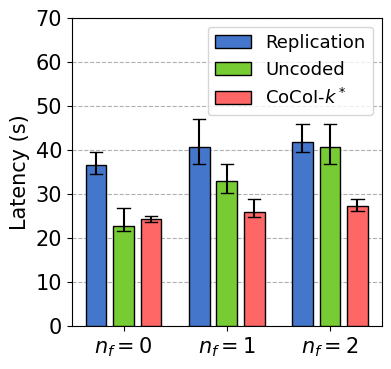

In [16]:
# resnet
# fail=0
resnet_f0 = {'repetition': {'min':34.49806213378906, 'mean':36.43476657867432, 'max':39.50594520568848},
'uncoded': {'min':21.60036063194275, 'mean':22.682096219062807, 'max':26.78972101211548},
'coded': {'min':23.65511417388916, 'mean':24.238034582138066, 'max':24.81348466873169}}
# resnet_f0 = {'repetition': {'min':36.20972037315369, 'mean':37.978605341911326, 'max':40.44732165336609},
# 'uncoded': {'min':22.391023874282837, 'mean':25.15702340602875, 'max':34.52159786224365},
# 'coded': {'min':24.216022491455078, 'mean':24.937415242195133, 'max':27.094403982162476}}
# fail=1
resnet_f1 = {'repetition': {'min':36.75760221481323, 'mean':40.6286277572314, 'max':46.863218784332275},
'uncoded': {'min':30.06712818145752, 'mean':32.96573748191198, 'max':36.80478882789612},
'coded': {'min':24.655969381332397, 'mean':25.80605181058248, 'max':27.96493673324585}}
# fail=2
resnet_f2 = {'repetition': {'min':39.55053925514221, 'mean':41.66065196196239, 'max':45.780380725860596},
'uncoded': {'min':36.83668398857117, 'mean':40.65775875250499, 'max':45.744242668151855},
'coded': {'min':26.033243656158447, 'mean':27.25547832250595, 'max':28.860251665115356}}


repetition_mean = [resnet_f0['repetition']['mean'], resnet_f1['repetition']['mean'], resnet_f2['repetition']['mean']]
uncoded_mean = [resnet_f0['uncoded']['mean'], resnet_f1['uncoded']['mean'], resnet_f2['uncoded']['mean']]
coded_mean = [resnet_f0['coded']['mean'], resnet_f1['coded']['mean'], resnet_f2['coded']['mean']]
repetition_min = [resnet_f0['repetition']['min'], resnet_f1['repetition']['min'], resnet_f2['repetition']['min']]
uncoded_min = [resnet_f0['uncoded']['min'], resnet_f1['uncoded']['min'], resnet_f2['uncoded']['min']]
coded_min = [resnet_f0['coded']['min'], resnet_f1['coded']['min'], resnet_f2['coded']['min']]
repetition_max = [resnet_f0['repetition']['max'], resnet_f1['repetition']['max'], resnet_f2['repetition']['max']]
uncoded_max = [resnet_f0['uncoded']['max'], resnet_f1['uncoded']['max'], resnet_f2['uncoded']['max']]
coded_max = [resnet_f0['coded']['max'], resnet_f2['coded']['max'], resnet_f2['coded']['max']]
repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
coded_mean = np.asarray(coded_mean)
repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
coded_min = np.asarray(coded_min)
repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
coded_max = np.asarray(coded_max)

print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(4, 4))
plt.grid(axis='y', ls='--', zorder=0)
# plt.bar(0, resnet_local, width, label='Local', color=colors[0], linewidth=1.0, edgecolor='black', yerr=[[resnet_local - resnet_local_min], [resnet_local_max - resnet_local]], zorder=10)

plt.bar(x - width*4/3, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*4/3, coded_mean, width, label='CoCoI-$k^*$', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

# draw the cap of the errorbar
errorbar_length = 0.12
errorbar_width = 1
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [resnet_local_min, resnet_local_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [resnet_local_max, resnet_local_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

mins = [repetition_min, uncoded_min, coded_min]
maxs = [repetition_max, uncoded_max, coded_max]
offsets = np.asarray([-1,0,1]) * (width*4/3)
for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=70)
plt.legend(fontsize=13)
# plt.tight_layout()
# plt.title('resnet inference')
file_name = 'resnet_inference_normal'
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()


When there are hard straggler in the system
- straggler=1

In [17]:
# the variance of local execution latency is small enough to ignore
vgg16_local = 50.35987997055054
vgg16_straggler_local = 84.97413873672485
resnet_straggler_local = 148.84249711036682

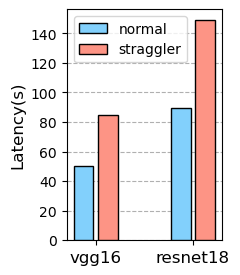

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 3))
plt.grid(axis='y', ls='--', zorder=0)
x_labels = ['vgg16', 'resnet18']
normal = [vgg16_local, resnet_local]
straggler = [vgg16_straggler_local, resnet_straggler_local]
xs = np.arange(len(x_labels))
bar_width = 0.25
plt.xticks(xs, x_labels, fontsize=12)
plt.yticks(fontsize=10)
plt.ylabel('Latency(s)', fontsize=12)
plt.bar(xs - bar_width/2, normal, width, label='normal', color='#82D0FC', linewidth=1.0, edgecolor='black', zorder=10)
plt.bar(xs + bar_width/2, straggler, width, label='straggler', color='#FD9485', linewidth=1.0, edgecolor='black', zorder=10)
plt.legend(fontsize=10)
plt.savefig('figures/local_inference.pdf', bbox_inches='tight')
plt.show()

VGG16

fail=0

In [19]:
# 没有改成全部收完
# test=1--day=20240603--model=vgg16--fail=0--repetition=12
# {'repetition': {'min':17.87149930000305, 'mean':18.83887686332067, 'max':21.3439519405365},
# 'uncoded': {'min':14.077126026153564, 'mean':20.2669131954511, 'max':39.74811792373657},
# 'coded': {'min':11.076831340789795, 'mean':11.452079017957052, 'max':13.0321204662323}}

# 这次repetition和coded的max太高了，那上面的补一下
# test=2--day=20240603--model=vgg16--fail=0--repetition=12
# {'repetition': {'min':25.155447006225586, 'mean':26.51227953036626, 'max':29.308602571487427},
# 'uncoded': {'min':12.937195062637329, 'mean':14.01494954029719, 'max':14.623278856277466},
# 'coded': {'min':11.1833336353302, 'mean':11.997017502784729, 'max':16.039602041244507}}

# 这一组coded无效
# test=3--day=20240603--model=vgg16--fail=0--repetition=12
# {'repetition': {'min':15.267238855361938, 'mean':15.993880271911623, 'max':17.226133823394775},
# 'uncoded': {'min':12.603066444396973, 'mean':19.354731011390687, 'max':40.19730734825134},
# 'coded': {'min':11.008901596069336, 'mean':11.238763189315796, 'max':11.861286163330078}}

# {'repetition': {'min':16.306212425231934, 'mean':17.65407855510712, 'max':19.298189401626587},

# test=4--day=20240612--model=vgg16--fail=0--repetition=10
# {'repetition': {'min':17.555234670639038, 'mean':18.50308697223663, 'max':19.62504267692566},
# 'uncoded': {'min':12.298407077789307, 'mean':14.3116042137146, 'max':15.297209978103638},
# 'coded': {'min':11.386804103851318, 'mean':11.678711485862731, 'max':12.152836799621582}}

# 筛选后的结果
vgg16_s1_f0 = {'repetition': {'min':16.81118416786194, 'mean':18.472139573097227, 'max':19.115964889526367},
'uncoded': {'min':12.937195062637329, 'mean':14.01494954029719, 'max':14.623278856277466},
'coded': {'min':11.008901596069336, 'mean':11.238763189315796, 'max':11.861286163330078}}

# vgg16_nf0 = {'repetition': {'min':16.306212425231934, 'mean':17.65407855510712, 'max':19.298189401626587},
# 'uncoded': {'min':9.97995376586914, 'mean':10.241773414611815, 'max':10.708218812942505},
# 'coded': {'min':10.946062326431274, 'mean':11.19745533466339, 'max':11.441893100738525}}

fail=1

In [20]:
# test=1--day=20240603--model=vgg16--fail=1--repetition=10  忘记保存结果了
# {'repetition': {'min':21.955262660980225, 'mean':26.28852820396423, 'max':28.541518211364746},
# 'uncoded': {'min':13.960270166397095, 'mean':16.711296558380127, 'max':19.99056649208069},
# 'coded': {'min':12.405256271362305, 'mean':12.72807743549347, 'max':13.259170532226562}}

# test=2--day=20240607--model=vgg16--fail=1--repetition=10
# {'repetition': {'min':20.658392190933228, 'mean':24.706189966201777, 'max':27.14521813392639},
# 'uncoded': {'min':14.74220323562622, 'mean':15.548647284507751, 'max':16.81520676612854},
# 'coded': {'min':12.145318508148193, 'mean':13.504131937026978, 'max':15.595143795013428}}

# test=3--day=20240612--model=vgg16--fail=1--repetition=10
# 'repetition': {'min':17.308956384658813, 'mean':19.176714897155765, 'max':23.44801354408264}

# test=4--day=20240612--model=vgg16--fail=1--repetition=15
# {'repetition': {'min':17.805280923843384, 'mean':19.35644507408142, 'max':22.86989998817444},
# 'uncoded': {'min':14.42305588722229, 'mean':15.366185569763186, 'max':16.79110336303711},
# 'coded': {'min':12.111967325210571, 'mean':12.623014624913532, 'max':13.567913293838501}}

vgg16_s1_f1 = {'repetition': {'min':17.805280923843384, 'mean':19.35644507408142, 'max':22.86989998817444},
'uncoded': {'min':13.960270166397095, 'mean':16.711296558380127, 'max':19.99056649208069},
'coded': {'min':12.405256271362305, 'mean':12.72807743549347, 'max':13.259170532226562}}

fail=2

In [21]:
# test=2--day=20240603--model=vgg16--fail=2--repetition=10  看上去straggler现在是概率拖慢（虽然这样最好
# {'repetition': {'min':18.51972723007202, 'mean':22.030950403213502, 'max':26.678730249404907},
# 'uncoded': {'min':16.665351629257202, 'mean':17.837669467926027, 'max':19.355161666870117},
# 'coded': {'min':13.4112069606781, 'mean':14.249966073036193, 'max':16.398685455322266}}

# test=3--day=20240612--model=vgg16--fail=1--repetition=10
# 'repetition': {'min':17.300042629241943, 'mean':19.39488904476166, 'max':24.898017168045044}
# 'repetition': {'min':17.60517120361328, 'mean':19.74702122211456, 'max':27.418193578720093}

# test=3--day=20240612--model=vgg16--fail=1--repetition=15
# 'repetition': {'min':17.734988689422607, 'mean':20.038997507095335, 'max':27.65105962753296}
# 'uncoded': {'min':16.255131483078003, 'mean':17.94876856803894, 'max':21.669920921325684}
# 'coded': {'min':13.512964963912964, 'mean':14.482175795237223, 'max':18.249911069869995}

# test=3--day=20240614--model=vgg16--fail=1--repetition=10
# 'coded': {'min':13.402697086334229, 'mean':13.945336985588073, 'max':14.465098142623901}

vgg16_s1_f2 = {'repetition': {'min':17.300042629241943, 'mean':19.39488904476166, 'max':24.898017168045044},
'uncoded': {'min':16.255131483078003, 'mean':17.94876856803894, 'max':21.669920921325684},
'coded': {'min':13.402697086334229, 'mean':13.945336985588073, 'max':14.465098142623901}}

Coded compared to uncoded reduction ratio [0.1980875  0.23835488 0.2230477 ]
Repetition increasing ratio 0.049953578361237705
Uncoded    increasing ratio 0.2806873486365997
CoCoI      increasing ratio 0.24082487998726587


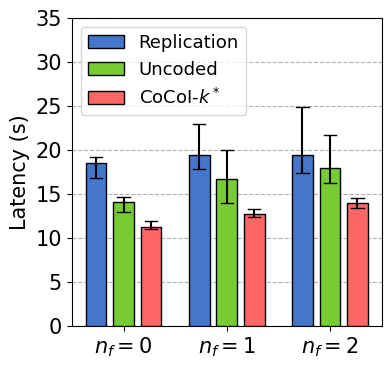

In [22]:
# vgg16

# labels = ['Local', 'Repetition', 'Uncoded', 'Coded']
# labels = ['repetition', 'uncoded', 'coded']


repetition_mean = [vgg16_s1_f0['repetition']['mean'], vgg16_s1_f1['repetition']['mean'], vgg16_s1_f2['repetition']['mean']]
uncoded_mean = [vgg16_s1_f0['uncoded']['mean'], vgg16_s1_f1['uncoded']['mean'], vgg16_s1_f2['uncoded']['mean']]
coded_mean = [vgg16_s1_f0['coded']['mean'], vgg16_s1_f1['coded']['mean'], vgg16_s1_f2['coded']['mean']]
repetition_min = [vgg16_s1_f0['repetition']['min'], vgg16_s1_f1['repetition']['min'], vgg16_s1_f2['repetition']['min']]
uncoded_min = [vgg16_s1_f0['uncoded']['min'], vgg16_s1_f1['uncoded']['min'], vgg16_s1_f2['uncoded']['min']]
coded_min = [vgg16_s1_f0['coded']['min'], vgg16_s1_f1['coded']['min'], vgg16_s1_f2['coded']['min']]
repetition_max = [vgg16_s1_f0['repetition']['max'], vgg16_s1_f1['repetition']['max'], vgg16_s1_f2['repetition']['max']]
uncoded_max = [vgg16_s1_f0['uncoded']['max'], vgg16_s1_f1['uncoded']['max'], vgg16_s1_f2['uncoded']['max']]
coded_max = [vgg16_s1_f0['coded']['max'], vgg16_s1_f1['coded']['max'], vgg16_s1_f2['coded']['max']]
repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
coded_mean = np.asarray(coded_mean)
repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
coded_min = np.asarray(coded_min)
repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
coded_max = np.asarray(coded_max)

print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(4, 4))
plt.grid(axis='y', ls='--', zorder=0)

# plt.bar(0, vgg16_local, width, bottom=0, label='Local', color='#C0C0C0', linewidth=1.0, edgecolor='black', zorder=10)
# plt.bar(0, vgg16_straggler_local - vgg16_local, width, bottom=vgg16_local, label='straggler', color='#808080', linewidth=1.0, edgecolor='black', zorder=10)
vgg16_local_mean = vgg16_local*0.9 + vgg16_straggler_local/10
# plt.bar(0, vgg16_local_mean, width, label='Local', color=colors[0], linewidth=1.0, edgecolor='black', yerr=[[vgg16_local_mean-vgg16_local], [vgg16_straggler_local-vgg16_local_mean]], zorder=10)

plt.bar(x - width*4/3, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*4/3, coded_mean, width, label='CoCoI-$k^*$', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

# draw the cap of the errorbar
errorbar_length = 0.12
errorbar_width = 1
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [vgg16_local, vgg16_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [vgg16_straggler_local, vgg16_straggler_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

mins = [repetition_min, uncoded_min, coded_min]
maxs = [repetition_max, uncoded_max, coded_max]
offsets = np.asarray([-1,0,1]) * (width*4/3)
for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=35)
plt.legend(fontsize=13)
# plt.title('vgg16 inference')
# plt.tight_layout()

file_name = 'vgg16_inference_straggler'
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()
# 这个图的数据也基本差不多了，如果coded的nf=2的还能测得更好一点就好了，剩下的同样是调一下图的显示了

Resnet

fail=0

In [23]:
# test=1--day=20240603--model=resnet--fail=0--repetition=12  # 这个repetition怎么这么高啊？repetition测时延的bug未解决。。。
# {'repetition': {'min':51.92271184921265, 'mean':53.904583096504204, 'max':55.779137134552},
# 'uncoded': {'min':27.788166761398315, 'mean':28.780390699704483, 'max':30.342568159103394},
# 'coded': {'min':25.337946891784668, 'mean':26.011874695618946, 'max':27.232060194015503}}

# test=2--day=20240603--model=resnet--fail=0--repetition=12  # uncoded由于repetition任务的积压导致mean/max过高
# nf0 = {'repetition': {'min':38.382057905197144, 'mean':41.44952406088511, 'max':45.89125037193298},
# 'uncoded': {'min':23.512204885482788, 'mean':28.808923721313477, 'max':53.07109308242798},
# 'coded': {'min':24.541630506515503, 'mean':25.45921155611674, 'max':26.818933725357056}}

# 筛选后的结果
resnet_s1_f0 = {'repetition': {'min':38.382057905197144, 'mean':41.44952406088511, 'max':45.89125037193298},
'uncoded': {'min':27.788166761398315, 'mean':28.780390699704483, 'max':30.342568159103394},
'coded': {'min':24.541630506515503, 'mean':25.45921155611674, 'max':26.818933725357056}}

# resnet_nf0 = {'repetition': {'min':34.49806213378906, 'mean':36.43476657867432, 'max':39.50594520568848},
# 'uncoded': {'min':21.60036063194275, 'mean':22.682096219062807, 'max':26.78972101211548},
# 'coded': {'min':23.65511417388916, 'mean':24.238034582138066, 'max':24.81348466873169}}

fail=1

In [24]:
# test=1--day=20240606--model=resnet--fail=1--repetition=10  这里repetition的结果还是有那个所有结果收集后测得时延变长的bug
# {'repetition': {'min':42.63253140449524, 'mean':47.357919335365295, 'max':53.942728757858276},
# 'uncoded': {'min':29.43101143836975, 'mean':32.046690058708194, 'max':38.468995571136475},
# 'coded': {'min':26.21708917617798, 'mean':27.31694619655609, 'max':28.79962944984436}}

# test=2--day=20240607--model=resnet--fail=1--repetition=10
# {'repetition': {'min':43.505502700805664, 'mean':49.71064147949218, 'max':56.42506265640259},
# 'uncoded': {'min':30.14555287361145, 'mean':33.47851703166961, 'max':37.98728704452515},
# 'coded': {'min':26.819257259368896, 'mean':28.195770025253296, 'max':31.17631769180298}}

# test=3--day=20240612--model=resnet--fail=1--repetition=10
# 'repetition': {'min':40.369712352752686, 'mean':42.75641102790833, 'max':47.74355959892273}

# test=4--day=20240614--model=resnet--fail=1--repetition=10
# 'uncoded': {'min':30.526767253875732, 'mean':32.76622591018677, 'max':37.10155653953552}

resnet_s1_f1 = {'repetition': {'min':40.369712352752686, 'mean':42.75641102790833, 'max':47.74355959892273},
'uncoded': {'min':30.14555287361145, 'mean':33.47851703166961, 'max':37.98728704452515},
'coded': {'min':26.21708917617798, 'mean':27.31694619655609, 'max':28.79962944984436}}

fail=2

In [25]:
# test=1--day=20240606--model=resnet--fail=2--repetition=10  这里repetition的结果 可能 还是有那个所有结果收集后测得时延变长的bug
# {'repetition': {'min':42.3029625415802, 'mean':46.58070859909058, 'max':51.36842155456543},
# 'uncoded': {'min':38.07293748855591, 'mean':40.75958669185639, 'max':48.62277889251709},
# 'coded': {'min':29.47803282737732, 'mean':30.984963655471798, 'max':32.73637413978577}}

# test=2--day=20240612--model=resnet--fail=2--repetition=10
# 'repetition': {'min':39.350801944732666, 'mean':42.85215260982513, 'max':52.554442405700684}

# test=3--day=20240612--model=resnet--fail=2--repetition=10
# 'coded': {'min':29.52024483680725, 'mean':31.501045632362363, 'max':36.05152654647827}

# test=4--day=20240614--model=resnet--fail=2--repetition=15
# 'coded': {'min':29.56321430206299, 'mean':30.88241820335388, 'max':32.95115089416504}
# test=5--day=20240614--model=resnet--fail=2--repetition=10
# 'coded': {'min':29.76085901260376, 'mean':30.78888623714447, 'max':32.56675934791565}
# 'coded': {'min':30.03893518447876, 'mean':30.910400772094725, 'max':32.57017731666565}

resnet_s1_f2 = {'repetition': {'min':39.350801944732666, 'mean':42.85215260982513, 'max':52.554442405700684},
'uncoded': {'min':38.07293748855591, 'mean':40.75958669185639, 'max':48.62277889251709},
'coded': {'min':29.76085901260376, 'mean':30.78888623714447, 'max':32.56675934791565}}

Coded compared to uncoded reduction ratio [0.11539729 0.18404551 0.24462222]
Repetition increasing ratio 0.033839436778084764
Uncoded    increasing ratio 0.41622770577172563
CoCoI      increasing ratio 0.20934170209003367


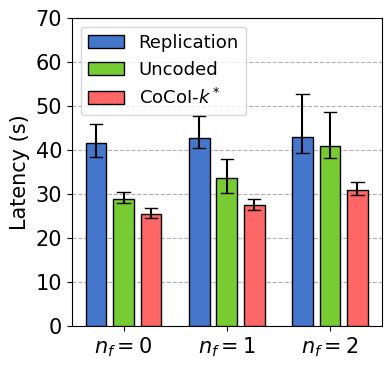

In [26]:
# resnet

repetition_mean = [resnet_s1_f0['repetition']['mean'], resnet_s1_f1['repetition']['mean'], resnet_s1_f2['repetition']['mean']]
uncoded_mean = [resnet_s1_f0['uncoded']['mean'], resnet_s1_f1['uncoded']['mean'], resnet_s1_f2['uncoded']['mean']]
coded_mean = [resnet_s1_f0['coded']['mean'], resnet_s1_f1['coded']['mean'], resnet_s1_f2['coded']['mean']]
repetition_min = [resnet_s1_f0['repetition']['min'], resnet_s1_f1['repetition']['min'], resnet_s1_f2['repetition']['min']]
uncoded_min = [resnet_s1_f0['uncoded']['min'], resnet_s1_f1['uncoded']['min'], resnet_s1_f2['uncoded']['min']]
coded_min = [resnet_s1_f0['coded']['min'], resnet_s1_f1['coded']['min'], resnet_s1_f2['coded']['min']]
repetition_max = [resnet_s1_f0['repetition']['max'], resnet_s1_f1['repetition']['max'], resnet_s1_f2['repetition']['max']]
uncoded_max = [resnet_s1_f0['uncoded']['max'], resnet_s1_f1['uncoded']['max'], resnet_s1_f2['uncoded']['max']]
coded_max = [resnet_s1_f0['coded']['max'], resnet_s1_f1['coded']['max'], resnet_s1_f2['coded']['max']]
repetition_mean = np.asarray(repetition_mean)
uncoded_mean = np.asarray(uncoded_mean)
coded_mean = np.asarray(coded_mean)
repetition_min = np.asarray(repetition_min)
uncoded_min = np.asarray(uncoded_min)
coded_min = np.asarray(coded_min)
repetition_max = np.asarray(repetition_max)
uncoded_max = np.asarray(uncoded_max)
coded_max = np.asarray(coded_max)

print('Coded compared to uncoded reduction ratio', 1 - coded_mean / uncoded_mean)
print('Repetition increasing ratio', repetition_mean[-1]/repetition_mean[0]-1)
print('Uncoded    increasing ratio', uncoded_mean[-1]/uncoded_mean[0]-1)
print('CoCoI      increasing ratio', coded_mean[-1]/coded_mean[0]-1)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(4, 4))
plt.grid(axis='y', ls='--', zorder=0)

# plt.bar(0, resnet_local, width, bottom=0, label='normal', color='#C0C0C0', linewidth=1.0, edgecolor='black', zorder=10)
# plt.bar(0, resnet_straggler_local - resnet_local, width, bottom=resnet_local, label='straggler', color='#808080', linewidth=1.0, edgecolor='black', zorder=10)
resnet_local_mean = resnet_local*0.9 + resnet_straggler_local/10
# plt.bar(0, resnet_local_mean, width, label='Local', color=colors[0], linewidth=1.0, edgecolor='black', yerr=[[resnet_local_mean-resnet_local], [resnet_straggler_local-resnet_local_mean]], zorder=10)

plt.bar(x - width*4/3, repetition_mean, width, label='Replication', color=colors[1], linewidth=1.0, edgecolor='black', yerr=[repetition_mean - repetition_min, repetition_max - repetition_mean], zorder=10)
plt.bar(x, uncoded_mean, width, label='Uncoded', color=colors[2], linewidth=1.0, edgecolor='black', yerr=[uncoded_mean - uncoded_min, uncoded_max - uncoded_mean], zorder=10)
plt.bar(x + width*4/3, coded_mean, width, label='CoCoI-$k^*$', color=colors[3], linewidth=1.0, edgecolor='black', yerr=[coded_mean - coded_min, coded_max - coded_mean], zorder=10)

# draw the cap of the errorbar
errorbar_length = 0.12
errorbar_width = 1
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [resnet_local, resnet_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
# plt.plot([0 - errorbar_length/2, 0 + errorbar_length/2], [resnet_straggler_local, resnet_straggler_local], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

mins = [repetition_min, uncoded_min, coded_min]
maxs = [repetition_max, uncoded_max, coded_max]
offsets = np.asarray([-1,0,1]) * (width*4/3)
for i, offset in enumerate(offsets):
    y_mins = mins[i]
    y_maxs = maxs[i]
    for x_i in x:
        x_center = x_i + offset
        y_min = y_mins[x_i]
        y_max = y_maxs[x_i]
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_min, y_min], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)
        plt.plot([x_center - errorbar_length/2, x_center + errorbar_length/2], [y_max, y_max], color='black', linestyle='-', linewidth=errorbar_width, zorder=11)

plt.ylabel('Latency (s)', fontsize=15)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(top=70)
plt.legend(fontsize=13)
# plt.title('resnet inference')
# plt.tight_layout()
file_name = 'resnet_inference_straggler'
if save:
    plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
plt.show()
#这个应该数据没什么问题了，调一下图就行吧

In [27]:
# labels = ['repetition', 'uncoded', 'coded']
# statistic = ['min', 'mean', 'max']
# data_normal = [vgg16_nf0[label] for label in labels]
# data_s1 = [vgg16_s1_f0[label] for label in labels]
# # data_normal = [resnet_nf0[label] for label in labels]
# # data_s1 = [resnet_s1_f0[label] for label in labels]

# normal = np.asarray([data['mean'] for data in data_normal])
# s1 = np.asarray([data['mean'] for data in data_s1])
# normal_min = np.asarray([data['min'] for data in data_normal])
# s1_min = np.asarray([data['min'] for data in data_s1])
# normal_max = np.asarray([data['max'] for data in data_normal])
# s1_max = np.asarray([data['max'] for data in data_s1])

# x = np.arange(len(labels))  # the label locations
# width = 0.15  # the width of the bars
# fontsize = 12

# plt.figure(figsize=(5, 5))
# plt.grid(axis='y', ls='--', zorder=0)
# plt.bar(x - width*2/3, normal, width, label='normal', color='#aaf69d', linewidth=1.0, edgecolor='black', yerr=[normal-normal_min, normal_max-normal])
# plt.bar(x + width*2/3, s1, width, label='straggler', color='#ff9e97', linewidth=1.0, edgecolor='black', yerr=[s1-s1_min, s1_max-s1])

# # plt.bar(x - width*4/3, nf0, width, label=r'$n_f=0$', color='#aaf69d', linewidth=1.0, edgecolor='black', yerr=[nf0 - nf0_min, nf0_max - nf0], zorder=10)
# # # nf1[1], nf1_min[1], nf1_max[1] = 15.4959922, 15.4959922 - 1.54745533, 15.4959922 + 3.712476  # the experiments before
# # plt.bar(x[1:], nf1, width, label=r'$n_f=1$', color='#ffcd90', linewidth=1.0, edgecolor='black', yerr=[nf1 - nf1_min, nf1_max - nf1], zorder=10)
# # # nf1, nf1_low, nf1_high = np.asarray([18.42076745, 15.4959922, 12.11668111]), np.asarray([1.64384212, 1.54745533, 0.46942259]), np.asarray([1.62861762, 3.712476, 1.62626599])
# # # plt.bar(x[1:], nf1, width, label=r'$n_f=1$', color='#ffcd90', linewidth=1.0, edgecolor='black', yerr=[nf1_low, nf1_high], zorder=10)  # the experiments before
# # plt.bar(x[1:] + width*4/3, nf2, width, label=r'$n_f=2$', color='#ff9e97', linewidth=1.0, edgecolor='black', yerr=[nf2 - nf2_min, nf2_max - nf2], zorder=10)


# # Add some text for labels, title and custom x-axis tick labels, etc.
# plt.ylabel('Latency (s)', fontsize=fontsize)
# plt.xticks(x, labels, fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(fontsize=10)
# plt.title('vgg16 inference')
# # if file_name is not None:
# #     plt.savefig('figures/' + file_name + '.pdf', bbox_inches='tight')
# plt.show()


Rebuttal ddl 7.1 11:59 AM

In [28]:
# VGG16

# Results of single method:
# 'uncoded': {'min':10.4898099899292, 'mean':12.425149393081663, 'max':14.172149181365967}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded': {'min':11.339622735977173, 'mean':11.625122976303098, 'max':12.07141375541687}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.15409977 1.21310093]
# Layer 1: [2.53479867 2.70701866]
# Layer 3: [0.8415278  0.88660567]
# Layer 4: [1.41045518 1.37752342]
# Layer 6: [0.52131479 0.50900397]
# Layer 7: [1.1333113  0.92814875]
# Layer 8: [0.90602472 0.96032302]
# Layer 10: [0.48971069 0.40390053]
# Layer 11: [1.27291973 1.01111152]
# Layer 12: [1.16414726 1.01807137]
# Layer 14: [0.68740585 0.49101436]
# Layer 15: [0.61852498 0.49569998]
# Layer 16: [0.50021775 0.49191103]
# Conv latency: [0.319610595703125, 2.5347986698150633, 0.841527795791626, 1.377523422241211, 0.5090039730072021, 0.9281487464904785, 0.906024718284607, 0.4039005279541016, 1.0111115217208861, 1.0180713653564453, 0.49101436138153076, 0.49569997787475584, 0.4919110298156738]
# Hybrid minimum of mean layer latency: 11.35352680683136

In [29]:
# Resnet

# Results of single method:
# 'uncoded': {'min':22.684961318969727, 'mean':24.876890301704407, 'max':29.254644870758057}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 54, 58, 61]
# 'coded': {'min':24.832937717437744, 'mean':25.83128237724304, 'max':29.180206537246704}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.14002466 1.21460543]
# Layer 3: [2.60713699 2.85025182]
# Layer 6: [2.41994774 2.63703496]
# Layer 10: [2.55621998 2.69037931]
# Layer 13: [2.49941955 2.74065623]
# Layer 17: [1.5863467  1.67394357]
# Layer 20: [1.30740294 1.32209897]
# Layer 22: [1.41072688 1.52834022]
# Layer 26: [1.25849879 1.34639957]
# Layer 29: [1.25740025 1.35609951]
# Layer 33: [0.85989907 0.94369965]
# Layer 36: [0.97070611 0.94990013]
# Layer 38: [0.6273061  0.75969992]
# Layer 42: [0.84879928 0.95021386]
# Layer 45: [0.89910765 0.94456544]
# Layer 49: [0.67201767 0.71751688]
# Layer 52: [1.21730287 1.01602747]
# Layer 54: [0.25060866 0.34650946]
# Layer 58: [1.13402948 1.01821339]
# Layer 61: [1.23435357 1.03261998]
# Conv latency: [0.31938815116882324, 2.6071369886398315, 2.4199477434158325, 2.556219983100891, 2.4994195461273194, 1.586346697807312, 1.3074029445648194, 0.3371391296386719, 1.2584987878799438, 1.2574002504348756, 0.8598990678787232, 0.9499001264572143, 0.3606750965118408, 0.8487992763519288, 0.8991076469421386, 0.6720176696777344, 1.0160274744033813, 0.25060865879058836, 1.0182133913040161, 1.0326199769973754]
# Hybrid minimum of mean layer latency: 24.337259244918823

Table 2